# 2. Intial data exploration

The purpose of this analysis was to explore user churn over time and get an intial feel for how much of the user base is being lost and when. How this analaysis fits in to the overall pipeline can be see below.

The functions used in this notebook were intentionally kept in a seperate PEP8 compliant python script (ct_analysis_shared_functions.py) to keep the notebook clean and a reasonable length.

#### Table of contents:

[1 Conversion rate](#first-bullet)<br>
[2 How first session completion translates to subscriptions](#second-bullet)<br>
[3 How long do users tend to keep active accounts?](#third-bullet)<br>
[4 Funnel analysis](#fourth-bullet)<br>
[5 Account ages by completion of 1st session ](#fifth-bullet)<br>

<img src="x_figures/overview.png",width=500,height=500>

In [2]:
#Make sure matplotlib graphs show up nicely in the Jupyter notebook
%matplotlib inline

#Load helper functions for analysis
%run x_python_scripts/ct_analysis_shared_functions.py

#Device and OS data generated from sql query 'device_os_data.sql'
raw_features = pd.read_pickle('x_data/features.pkl')

## 1 Conversion rate <a class="anchor" id="first-bullet"></a>
Of the 10,315 customers looked at, 12.6% go on to become paying customers

In [3]:
#create copy of features dataframe to avoid altering original
new = raw_features.copy()

#account_age = max-min start timestamp in sessions table (i.e. feature is a timedelta)
new['account_age'] = new['end_date'] - new['start_date']

#pull out the two columns we are interested in
#session_completed = 1: user completed first session; 0: user did not complete the first session
paying_customer_prob=new.loc[:,('session_completed','account_age')]

#Using the timedelta we label each user as subscriber = 1 if account is longer than a month and 0 if it is not
paying_customer_prob['subscriber'] = [1 if x > datetime.timedelta(days=31) 
                                 else 0 for x in paying_customer_prob['account_age']]
#remove the column account_age
#paying_customer_prob.pop('account_age')
#Total number of users
print("total number of users: {}".format(len(paying_customer_prob)))

print('Percentage of customers that become subscribers')
print(paying_customer_prob["subscriber"].value_counts(normalize=True)*100)

total number of users: 10315
Percentage of customers that become subscribers
0    87.435773
1    12.564227
Name: subscriber, dtype: float64


# 2 How first session completion translates to subscriptions  <a class="anchor" id="second-bullet"></a>

For the focus user group (i.e. not current trial users, beta users, or clinician assisted users) 82% completed the first session and 18% did not (n=10,315). Of those who did not complete the first session only 6.62% went on to month 2 (i.e. subscribed). For those that completed the first session, 13.87% went on to use the app in month 2. So users that completed the first sesion were TWICE as likely to go on to become subscribers.

In [4]:
#Summary table
from __future__ import division
print('Percentage of customers that complete first session')
print(paying_customer_prob["session_completed"].value_counts(normalize=True)*100)
print
flattened =paying_customer_prob.groupby(
    ["subscriber","session_completed"]).size().unstack('session_completed').fillna(0)
print(flattened)
print
print("Of users that didn't complete the first session, {} % went on to subscribe").format(round(123/(123+1734)*100,2))
print("Of users that did complete the first session, {} % went on to subscribe").format(round(1173/(1173+7285)*100,2))

Percentage of customers that complete first session
1    81.997092
0    18.002908
Name: session_completed, dtype: float64

session_completed     0     1
subscriber                   
0                  1734  7285
1                   123  1173

Of users that didn't complete the first session, 6.62 % went on to subscribe
Of users that did complete the first session, 13.87 % went on to subscribe


Since users that complete the first session are twice as likely to become subscribers it becomes important to answer the question:<b>what are the features associated with users that complete the first session?</b>To answer this, feature engineering and a classification model for first session completion is done later. First however, lets look closer at how churn rates over calendar time relates to first session completion.

## 3 How long do users tend to keep active accounts?  <a class="anchor" id="third-bullet"></a>

Distribution of time span users actively use app. Note that this is active use, not account age; it is possible that users are keeping accounts that they are not actively using (although it seems unlikely they would do this for long at $19.99/month).

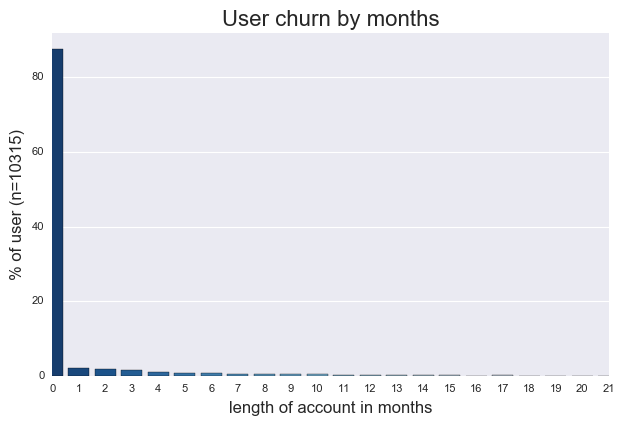

In [5]:
# Most users quit after first month, probably due to the subscription charge
plot_churn_percent(paying_customer_prob['account_age'], 'M','months',0,21,'churn_all_months');

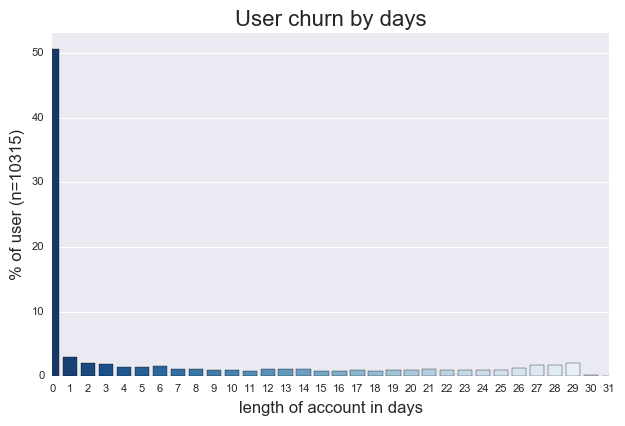

In [6]:
# Most users quit after <1 day
plot_churn_percent(paying_customer_prob['account_age'], 'D','days',0, 31,'churn_first_month');

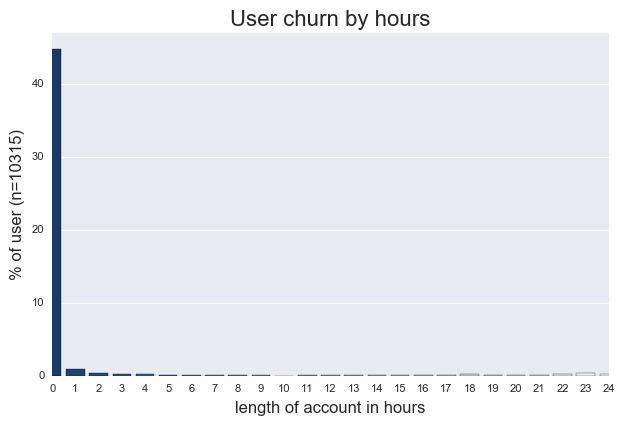

In [7]:
# Many users quit in the first hour
plot_churn_percent(paying_customer_prob['account_age'], 'h','hours', 0, 24, 'churn_first_day');

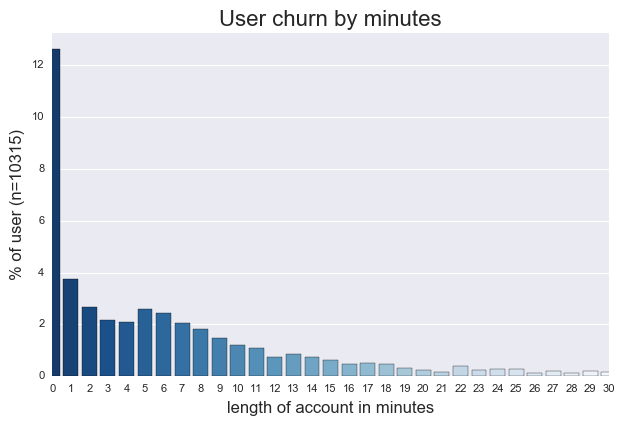

In [8]:
#Most users quit after less than one minute?!?! Are we sure these aren't bots?
#In the first hour of use most of the churn happens in the first 20 minutes
plot_churn_percent(paying_customer_prob['account_age'], 'm','minutes', 0, 30,'churn_first_hour');

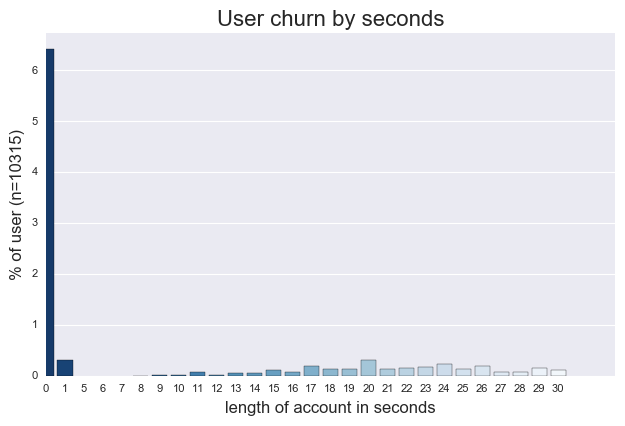

In [9]:
plot_churn_percent(paying_customer_prob['account_age'], 's','seconds', 0,30,'churn_first_minute');

## 4 Funnel analysis  <a class="anchor" id="fourth-bullet"></a>

In [10]:
print("Total no. of users that created acounts in 2015 and 2016:")
print len(paying_customer_prob)

print("% left in first month:")
month_1 = funnel(paying_customer_prob,'days', 31)
print month_1

print("% left in first day:")
day_1 = funnel(paying_customer_prob,'days', 1)
print day_1

print("% left in first hour:")
hour_1 = funnel(paying_customer_prob,'hours', 1)
print hour_1

print("% left in first 30 minutes:")
min_30 =funnel(paying_customer_prob,'minutes', 30)
print min_30

print("% left in 10 first minute:")
min_10 = funnel(paying_customer_prob,'minutes', 10)
print min_10

print("% left in 5 first minute:")
min_5 = funnel(paying_customer_prob,'minutes', 5)
print min_5   

print("% left in 3 first minute:")
min_3 = funnel(paying_customer_prob,'minutes', 3)
print min_3

print("% left in 1 first minute:")
min_1 = funnel(paying_customer_prob,'minutes', 1)
print min_1

print("% left in first 30 second:")
sec_1 = funnel(paying_customer_prob,'seconds', 30)
print sec_1

Total no. of users that created acounts in 2015 and 2016:
10315
% left in first month:
87.44
% left in first day:
50.61
% left in first hour:
44.77
% left in first 30 minutes:
42.94
% left in 10 first minute:
33.71
% left in 5 first minute:
23.37
% left in 3 first minute:
19.1
% left in 1 first minute:
12.74
% left in first 30 second:
9.8


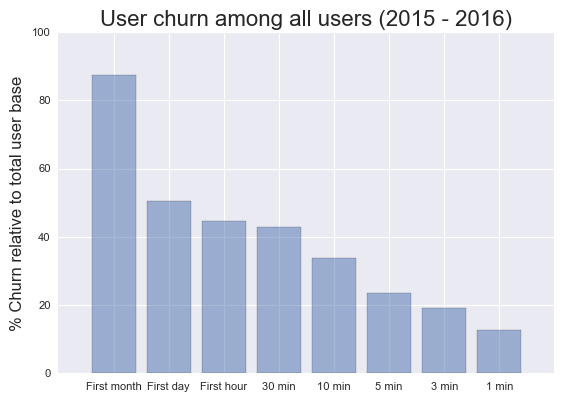

In [11]:
objects = ('First month', 'First day', 'First hour', '30 min','10 min','5 min','3 min','1 min')
y_pos = np.arange(len(objects))
churn = [month_1,day_1,hour_1, min_30,min_10,min_5,min_3,min_1]
 
plt.bar(y_pos, churn, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('% Churn relative to total user base')
plt.title('User churn among all users (2015 - 2016)')
plt.ylim(0,100)

plt.savefig('x_figures/2_initial_exploration/funnel_analysis.jpg')

## 5 Account ages by completion of 1st session  <a class="anchor" id="fifth-bullet"></a>
The distribution of account ages (i.e. how long the user chooses to engage with the app) are different for the users that complete the first session and those who struggle and do not complete the first session. 

The distributions betwee first session completers and non-completers is especially different in the first 30 minutes of app use.

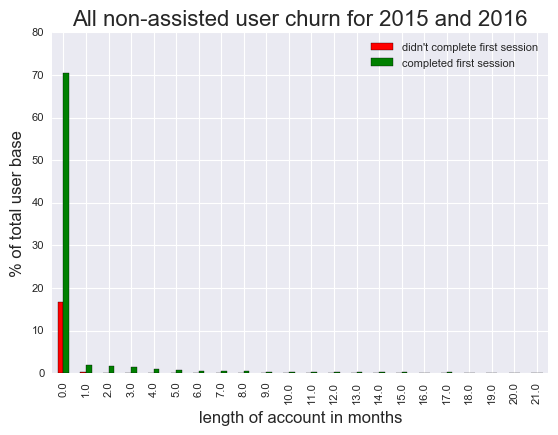

In [12]:
plot_churn2(paying_customer_prob, 'M', 'All non-assisted user churn for 2015 and 2016','months', 0, 24)
plt.savefig('x_figures/2_initial_exploration/monthly.jpg',dpi =300) 

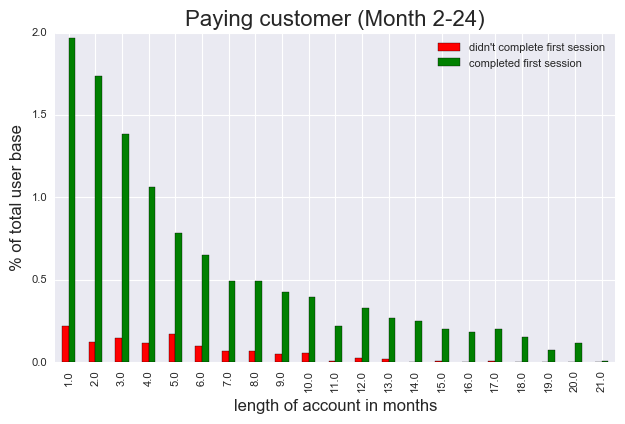

In [13]:
plot_churn2(paying_customer_prob, 'M', 'Paying customer (Month 2-24)','months', 1, 24)
plt.tight_layout()
plt.savefig('x_figures/2_initial_exploration/paying clients.jpg',dpi =300) 

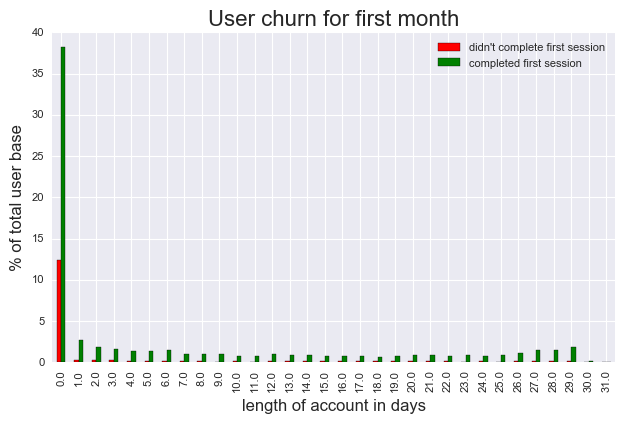

In [14]:
plot_churn2(paying_customer_prob, 'D', 'User churn for first month','days', 0, 31)
plt.tight_layout()
plt.savefig('x_figures/2_initial_exploration/first_month.jpg',dpi =300) 

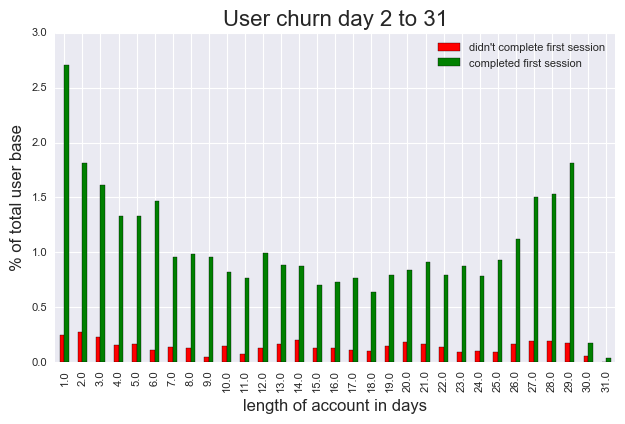

In [15]:
plot_churn2(paying_customer_prob, 'D', 'User churn day 2 to 31','days',1 , 31)
plt.tight_layout()
plt.savefig('x_figures/2_initial_exploration/day_2_31.jpg',dpi =300) 

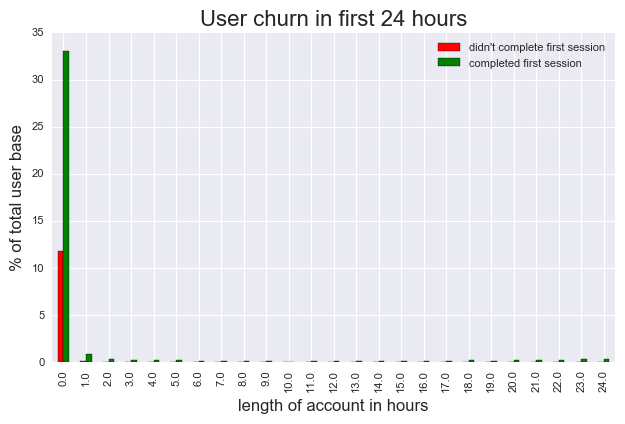

In [16]:
plot_churn2(paying_customer_prob, 'h', 'User churn in first 24 hours','hours', 0, 24)
plt.tight_layout()
plt.savefig('x_figures/2_initial_exploration/first_day_hourly.jpg',dpi =300) 

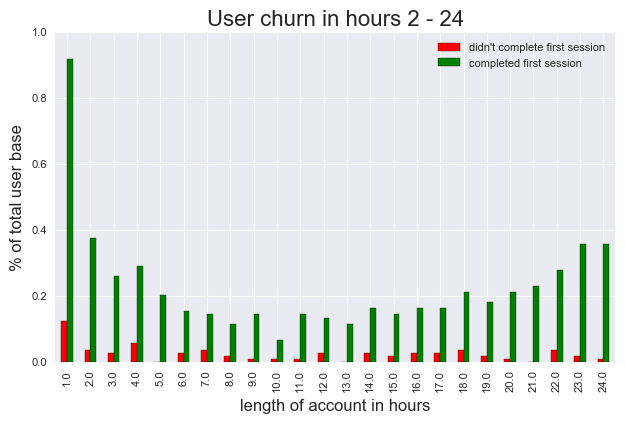

In [17]:
plot_churn2(paying_customer_prob, 'h', 'User churn in hours 2 - 24','hours', 1, 24)
plt.tight_layout()
plt.savefig('x_figures/2_initial_exploration/hours_2_24.jpg',dpi =300) 

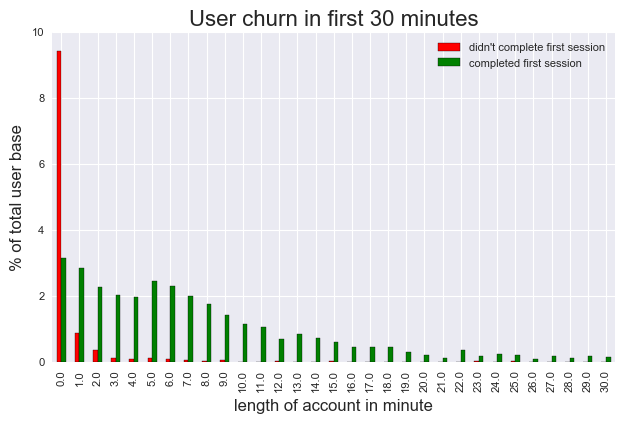

In [18]:
plot_churn2(paying_customer_prob, 'm', 'User churn in first 30 minutes','minute', 0, 30)
plt.tight_layout()
plt.savefig('x_figures/2_initial_exploration/first_30_minutes.jpg',dpi =300) 

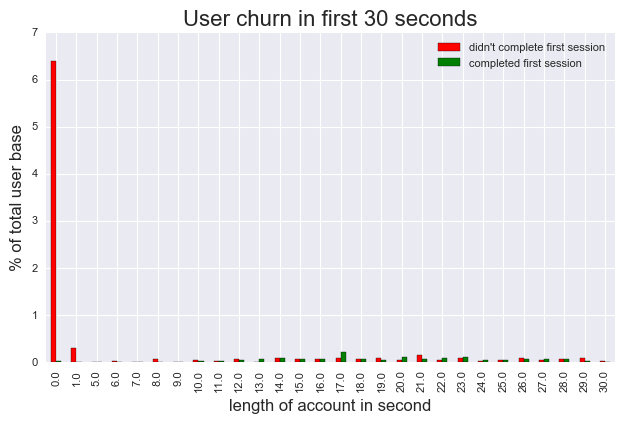

In [19]:
plot_churn2(paying_customer_prob, 's', 'User churn in first 30 seconds','second', 0, 30)
plt.tight_layout()
plt.savefig('x_figures/2_initial_exploration/first_30_seconds.jpg',dpi =300)